In [33]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta as taa
import warnings
warnings.filterwarnings('ignore')

nifty500 = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_500')[2]

print(nifty500)

nifty500['Symbol'] = nifty500[3].str.replace('.', '-')

symbols_list = nifty500['Symbol'].unique().tolist()
print(symbols_list)

end_date = '31-07-2024'

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*5)

         0                                   1  \
0    Sl.No                        Company Name   
1        1                    360 ONE WAM Ltd.   
2        2                       3M India Ltd.   
3        3                      ABB India Ltd.   
4        4                            ACC Ltd.   
..     ...                                 ...   
498    498  Zee Entertainment Enterprises Ltd.   
499    499             Zensar Technolgies Ltd.   
500    500                         Zomato Ltd.   
501    501             Zydus Lifesciences Ltd.   
502    502                eClerx Services Ltd.   

                                     2           3       4             5  
0                             Industry      Symbol  Series     ISIN Code  
1                   Financial Services      360ONE      EQ  INE466L01038  
2                          Diversified     3MINDIA      EQ  INE470A01017  
3                        Capital Goods         ABB      EQ  INE117A01022  
4               Construc

In [34]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
df = pd.read_excel("nifty500_data - Copy.xlsx")

df

,date,ticker,adj close,open,high,low,close,average,volume
0,19-Sep-2019,360ONE,417.45,1210.00,1270.50,1210.00,1270.50,1267.85,1777465
1,02-Nov-2023,360ONE,529.45,530.05,555.00,529.80,551.55,546.87,371991
2,03-Nov-2023,360ONE,551.55,539.20,546.95,527.45,531.10,533.06,1205994
3,06-Nov-2023,360ONE,531.10,537.00,538.55,527.05,529.10,532.12,181150
4,07-Nov-2023,360ONE,529.10,531.25,533.95,518.10,530.85,526.35,138394
...,...,...,...,...,...,...,...,...,...
670904,26-Mar-2021,ZYDUSLIFE,420.20,423.00,424.65,415.20,420.20,420.53,2221380
670905,30-Mar-2021,ZYDUSLIFE,420.20,424.00,436.30,422.25,434.55,430.76,1997389
670906,31-Mar-2021,ZYDUSLIFE,434.55,435.10,447.20,432.85,440.90,441.24,2732398
670907,15-Mar-2021,ZYDUSLIFE,442.50,442.00,442.50,430.60,439.95,436.48,1485949


In [36]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y')
df = df.sort_values(by=['date', 'ticker'], ascending=[True, True])

df

,date,ticker,adj close,open,high,low,close,average,volume
2018,2019-07-31,3MINDIA,20989.85,20990.00,21222.00,20669.25,21107.90,20921.43,846
3454,2019-07-31,AARTIIND,1630.55,1620.00,1679.00,1617.05,1666.00,1643.26,26257
5001,2019-07-31,AAVAS,1430.20,1411.05,1512.60,1391.00,1491.20,1439.03,32101
5947,2019-07-31,ABB,1358.30,1361.00,1374.00,1337.90,1363.10,1358.36,53331
6831,2019-07-31,ABBOTINDIA,8490.80,8500.00,8500.00,8278.00,8363.60,8343.71,3723
...,...,...,...,...,...,...,...,...,...
666068,2024-08-20,ZEEL,135.08,135.20,136.18,135.02,135.30,135.39,6500142
666478,2024-08-20,ZENSARTECH,782.55,790.00,811.60,783.00,790.75,798.61,961249
668511,2024-08-20,ZFCVINDIA,15962.55,15962.00,15962.00,15470.00,15785.45,15659.44,13133
669039,2024-08-20,ZOMATO,262.17,262.00,264.45,258.25,263.12,261.01,132396556


In [37]:
df_pivot = df.pivot_table(index=['date', 'ticker'], 
                          values=['adj close', 'open', 'high', 'low', 'close', 'average', 'volume'],
                          aggfunc='first')
                          
df_pivot

adj close   average     close      high       low  \
date       ticker                                                          
2019-07-31 3MINDIA      20989.85  20921.43  21107.90  21222.00  20669.25   
           AARTIIND      1630.55   1643.26   1666.00   1679.00   1617.05   
           AAVAS         1430.20   1439.03   1491.20   1512.60   1391.00   
           ABB           1358.30   1358.36   1363.10   1374.00   1337.90   
           ABBOTINDIA    8490.80   8343.71   8363.60   8500.00   8278.00   
...                          ...       ...       ...       ...       ...   
2024-08-20 ZEEL           135.08    135.39    135.30    136.18    135.02   
           ZENSARTECH     782.55    798.61    790.75    811.60    783.00   
           ZFCVINDIA    15962.55  15659.44  15785.45  15962.00  15470.00   
           ZOMATO         262.17    261.01    263.12    264.45    258.25   
           ZYDUSLIFE     1184.95   1184.73   1192.65   1195.80   1171.00   

                           open     volume  
date       ticker                           
2019-07-31 3MINDIA     20990.00        846  
           AARTIIND     1620.00      26257  
           AAVAS        1411.05      32101  
           ABB          1361.00      53331  
           ABBOTINDIA   8500.00       3723  
...                         ...        ...  
2024-08-20 ZEEL          135.20    6500142  
           ZENSARTECH    790.00     961249  
           ZFCVINDIA   15962.00      13133  
           ZOMATO        262.00  132396556  
           ZYDUSLIFE    1193.80    1876826  

[576587 rows x 7 columns]

In [38]:
df_pivot['garman_klass_vol'] = ((np.log(df_pivot['high'])-np.log(df_pivot['low']))**2)/2-(2*np.log(2)-1)*((np.log(df_pivot['adj close'])-np.log(df_pivot['open']))**2)

df_pivot['rsi'] = df_pivot.groupby(level=0)['adj close'].transform(lambda x: taa.rsi(df_pivot['close'], length=14))

if len(df_pivot['close'].dropna()) >= 20:  # Ensure there are at least 20 non-NaN values
    bbands = taa.bbands(df_pivot['close'], length=20)
    if bbands is not None and not bbands.empty:
        # Assign the Bollinger Bands to the appropriate columns
        df_pivot['bb_upper'], df_pivot['bb_middle'], df_pivot['bb_lower'] = bbands['BBU_20_2.0'], bbands['BBM_20_2.0'], bbands['BBL_20_2.0']
    else:
        print(f"Bollinger Bands calculation returned None or empty for ticker: {df_pivot.name}")
else:
    print(f"Not enough data to calculate Bollinger Bands for ticker: {df_pivot.name}")

df_pivot['atr'] = taa.atr(df_pivot['high'], df_pivot['low'], df_pivot['close'])

if len(df_pivot['close'].dropna()) >= 26:  # Ensure there are at least 26 non-NaN values
    macd = taa.macd(df_pivot['close'])
    if macd is not None:
      df_pivot['macd'], df_pivot['macd_signal'], df_pivot['macd_hist'] = macd.iloc[:, 0], macd.iloc[:, 1], macd.iloc[:, 2]
    else:
      print("MACD calculation returned None for ticker:", df_pivot.name)
else:
    print("Not enough data to calculate MACD for ticker:", df_pivot.name)

df_pivot['rupee_volume'] = df_pivot['close'] * df_pivot['volume'] / 1e6

df_pivot

adj close   average     close      high       low  \
date       ticker                                                          
2019-07-31 3MINDIA      20989.85  20921.43  21107.90  21222.00  20669.25   
           AARTIIND      1630.55   1643.26   1666.00   1679.00   1617.05   
           AAVAS         1430.20   1439.03   1491.20   1512.60   1391.00   
           ABB           1358.30   1358.36   1363.10   1374.00   1337.90   
           ABBOTINDIA    8490.80   8343.71   8363.60   8500.00   8278.00   
...                          ...       ...       ...       ...       ...   
2024-08-20 ZEEL           135.08    135.39    135.30    136.18    135.02   
           ZENSARTECH     782.55    798.61    790.75    811.60    783.00   
           ZFCVINDIA    15962.55  15659.44  15785.45  15962.00  15470.00   
           ZOMATO         262.17    261.01    263.12    264.45    258.25   
           ZYDUSLIFE     1184.95   1184.73   1192.65   1195.80   1171.00   

                           open     volume  garman_klass_vol        rsi  \
date       ticker                                                         
2019-07-31 3MINDIA     20990.00        846          0.000348        NaN   
           AARTIIND     1620.00      26257          0.000690        NaN   
           AAVAS        1411.05      32101          0.003442        NaN   
           ABB          1361.00      53331          0.000353        NaN   
           ABBOTINDIA   8500.00       3723          0.000350        NaN   
...                         ...        ...               ...        ...   
2024-08-20 ZEEL          135.20    6500142          0.000036  47.238120   
           ZENSARTECH    790.00     961249          0.000609  49.355741   
           ZFCVINDIA   15962.00      13133          0.000490  74.535336   
           ZOMATO        262.00  132396556          0.000281  47.955167   
           ZYDUSLIFE    1193.80    1876826          0.000198  49.125177   

                          bb_upper  bb_middle     bb_lower          atr  \
date       ticker                                                         
2019-07-31 3MINDIA             NaN        NaN          NaN          NaN   
           AARTIIND            NaN        NaN          NaN          NaN   
           AAVAS               NaN        NaN          NaN          NaN   
           ABB                 NaN        NaN          NaN          NaN   
           ABBOTINDIA          NaN        NaN          NaN          NaN   
...                            ...        ...          ...          ...   
2024-08-20 ZEEL        1762.312171   720.8775  -320.557171  1226.549238   
           ZENSARTECH  1725.109619   702.4625  -320.184619  1187.245721   
           ZFCVINDIA   8113.624668  1463.4275 -5186.769668  2186.103170   
           ZOMATO      8112.493859  1459.6810 -5193.131859  3139.038658   
           ZYDUSLIFE   8115.386359  1463.2210 -5188.944359  2981.441611   

                             macd  macd_signal   macd_hist  rupee_volume  
date       ticker                                                         
2019-07-31 3MINDIA            NaN          NaN         NaN     17.857283  
           AARTIIND           NaN          NaN         NaN     43.744162  
           AAVAS              NaN          NaN         NaN     47.869011  
           ABB                NaN          NaN         NaN     72.695486  
           ABBOTINDIA         NaN          NaN         NaN     31.137683  
...                           ...          ...         ...           ...  
2024-08-20 ZEEL       -298.852720   -23.742925 -275.109795    879.469213  
           ZENSARTECH -268.185068     5.539782 -273.724850    760.107647  
           ZFCVINDIA   955.056940   983.025431  -27.968492    207.310315  
           ZOMATO      664.305043   553.818828  110.486215  34836.181815  
           ZYDUSLIFE   503.088087   314.081497  189.006589   2238.396529  

[576587 rows x 17 columns]

In [39]:
last_cols = [c for c in df_pivot.columns.unique(0) if c not in ['rupee_volume', 'volume', 'open',
                                                          'high', 'low', 'close', 'average']]

data = (pd.concat([df_pivot.unstack('ticker')['rupee_volume'].resample('M').mean().stack('ticker').to_frame('rupee_volume'),
                   df_pivot.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()

data

rupee_volume  adj close  garman_klass_vol        rsi  \
date       ticker                                                             
2019-07-31 ATGL           87.196870     157.55          0.003540  40.874230   
           ATUL          564.457886    3646.80          0.000103  53.247480   
           AUBANK        163.112158     654.55          0.003450  44.692055   
           AUROPHARMA   1571.683552     551.95          0.001650  44.414381   
           AVANTIFEED    103.596720     308.00          0.000955  43.698372   
...                             ...        ...               ...        ...   
2024-08-31 ZEEL         1390.181160     135.08          0.000036  47.238120   
           ZENSARTECH    857.290241     782.55          0.000609  49.355741   
           ZFCVINDIA     168.942164   15962.55          0.000490  74.535336   
           ZOMATO      27333.325775     262.17          0.000281  47.955167   
           ZYDUSLIFE    3026.911291    1184.95          0.000198  49.125177   

                          bb_upper  bb_middle     bb_lower          atr  \
date       ticker                                                         
2019-07-31 ATGL        2033.914214   773.2700  -487.374214  1124.951009   
           ATUL        2691.252054   946.0025  -799.247054  1312.118919   
           AUBANK      2607.690439   894.6650  -818.360439  1442.894958   
           AUROPHARMA  2597.965428   879.1350  -839.695428  1342.606883   
           AVANTIFEED  2495.670655   807.4925  -880.685655  1260.730117   
...                            ...        ...          ...          ...   
2024-08-31 ZEEL        1762.312171   720.8775  -320.557171  1226.549238   
           ZENSARTECH  1725.109619   702.4625  -320.184619  1187.245721   
           ZFCVINDIA   8113.624668  1463.4275 -5186.769668  2186.103170   
           ZOMATO      8112.493859  1459.6810 -5193.131859  3139.038658   
           ZYDUSLIFE   8115.386359  1463.2210 -5188.944359  2981.441611   

                             macd  macd_signal   macd_hist  
date       ticker                                           
2019-07-31 ATGL       -465.464641   185.904296 -651.368937  
           ATUL       -207.472909   355.116822 -562.589731  
           AUBANK     -239.326990   258.610193 -497.937183  
           AUROPHARMA -270.096118   182.272852 -452.368970  
           AVANTIFEED -312.037218   112.265402 -424.302620  
...                           ...          ...         ...  
2024-08-31 ZEEL       -298.852720   -23.742925 -275.109795  
           ZENSARTECH -268.185068     5.539782 -273.724850  
           ZFCVINDIA   955.056940   983.025431  -27.968492  
           ZOMATO      664.305043   553.818828  110.486215  
           ZYDUSLIFE   503.088087   314.081497  189.006589  

[28511 rows x 11 columns]

In [40]:
data['rupee_volume'] = (data.loc[:, 'rupee_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data['rupee_vol_rank'] = (data.groupby('date')['rupee_volume'].rank(ascending=False))

data = data[data['rupee_vol_rank']<150].drop(['rupee_volume', 'rupee_vol_rank'], axis=1)

data

adj close  garman_klass_vol        rsi     bb_upper  \
date       ticker                                                            
2020-06-30 ATGL           157.35          0.002204  47.588755  2904.984126   
           AUBANK         543.65          0.001073  48.467928  3561.914948   
           AUROPHARMA     789.40          0.000783  48.940440  3416.443892   
           AVANTIFEED     523.30          0.001665  48.381048  3293.897815   
           AXISBANK       404.80          0.000282  48.163938  3290.076094   
...                          ...               ...        ...          ...   
2024-08-31 WIPRO          519.75          0.000115  48.225028  1821.647246   
           YESBANK         24.45          0.000068  46.889563  1830.442899   
           ZEEL           135.08          0.000036  47.238120  1762.312171   
           ZOMATO         262.17          0.000281  47.955167  8112.493859   
           ZYDUSLIFE     1184.95          0.000198  49.125177  8115.386359   

                       bb_middle     bb_lower          atr        macd  \
date       ticker                                                        
2020-06-30 ATGL        1009.8025  -885.379126  1553.539684  -75.444958   
           AUBANK      1113.3150 -1335.284948  1921.499268  113.532654   
           AUROPHARMA  1033.4850 -1349.473892  1802.135035   53.995883   
           AVANTIFEED   953.3475 -1387.202815  1692.818247  -14.580174   
           AXISBANK     969.7200 -1350.636094  1579.077658  -75.947395   
...                          ...          ...          ...         ...   
2024-08-31 WIPRO        789.5275  -242.592246  1374.771424 -210.981506   
           YESBANK      784.4750  -261.492899  1312.309180 -266.912121   
           ZEEL         720.8775  -320.557171  1226.549238 -298.852720   
           ZOMATO      1459.6810 -5193.131859  3139.038658  664.305043   
           ZYDUSLIFE   1463.2210 -5188.944359  2981.441611  503.088087   

                       macd_signal   macd_hist  
date       ticker                               
2020-06-30 ATGL         102.702718 -178.147676  
           AUBANK       171.063556  -57.530902  
           AUROPHARMA    89.221428  -35.225545  
           AVANTIFEED    16.516297  -31.096471  
           AXISBANK     -35.880739  -40.066656  
...                            ...         ...  
2024-08-31 WIPRO         58.758044 -269.739550  
           YESBANK        2.261943 -269.174064  
           ZEEL         -23.742925 -275.109795  
           ZOMATO       553.818828  110.486215  
           ZYDUSLIFE    314.081497  189.006589  

[7599 rows x 10 columns]

In [41]:
def calculate_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:

        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df
    
    
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data

adj close  garman_klass_vol        rsi     bb_upper  \
date       ticker                                                            
2021-06-30 AUBANK        1077.30          0.001183  48.560403  5707.359987   
           AUROPHARMA     967.20          0.000071  48.466479  5705.224251   
           AXISBANK       751.95          0.000171  48.203453  5563.761928   
           BAJAJ-AUTO    4124.65          0.000056  53.488445  5860.453270   
           BAJAJFINSV   12299.90          0.000305  63.052211  8389.261341   
...                          ...               ...        ...          ...   
2024-08-31 WIPRO          519.75          0.000115  48.225028  1821.647246   
           YESBANK         24.45          0.000068  46.889563  1830.442899   
           ZEEL           135.08          0.000036  47.238120  1762.312171   
           ZOMATO         262.17          0.000281  47.955167  8112.493859   
           ZYDUSLIFE     1184.95          0.000198  49.125177  8115.386359   

                       bb_middle     bb_lower          atr        macd  \
date       ticker                                                        
2021-06-30 AUBANK      1614.3375 -2478.684987  2826.379473  357.999473   
           AUROPHARMA  1654.6050 -2396.014251  2629.677367  212.866599   
           AXISBANK    1571.6500 -2420.461928  2311.430995  -38.488309   
           BAJAJ-AUTO  1761.3100 -2337.833270  2390.307353  152.289464   
           BAJAJFINSV  2323.8575 -3741.546341  2807.835399  936.222028   
...                          ...          ...          ...         ...   
2024-08-31 WIPRO        789.5275  -242.592246  1374.771424 -210.981506   
           YESBANK      784.4750  -261.492899  1312.309180 -266.912121   
           ZEEL         720.8775  -320.557171  1226.549238 -298.852720   
           ZOMATO      1459.6810 -5193.131859  3139.038658  664.305043   
           ZYDUSLIFE   1463.2210 -5188.944359  2981.441611  503.088087   

                       macd_signal   macd_hist  return_1m  return_2m  \
date       ticker                                                      
2021-06-30 AUBANK       323.989255   34.010218   0.082224  -0.021212   
           AUROPHARMA   143.085105   69.781494  -0.053806   0.000000   
           AXISBANK     -85.575644   47.087335   0.016355   0.022373   
           BAJAJ-AUTO    84.161703   68.127761  -0.017824   0.036881   
           BAJAJFINSV   694.475413  241.746614   0.050089   0.049052   
...                            ...         ...        ...        ...   
2024-08-31 WIPRO         58.758044 -269.739550  -0.003356   0.008723   
           YESBANK        2.261943 -269.174064  -0.049008   0.019796   
           ZEEL         -23.742925 -275.109795  -0.069441  -0.054840   
           ZOMATO       553.818828  110.486215   0.154273   0.144494   
           ZYDUSLIFE    314.081497  189.006589  -0.028252   0.058797   

                       return_3m  return_6m  return_9m  return_12m  
date       ticker                                                   
2021-06-30 AUBANK      -0.060449   0.039788   0.056602    0.056804  
           AUROPHARMA   0.035776   0.010814   0.021803    0.017072  
           AXISBANK     0.026428   0.031272   0.064331    0.052735  
           BAJAJ-AUTO   0.040009   0.030307   0.040017    0.030999  
           BAJAJFINSV   0.089825   0.054189   0.085528    0.063280  
...                          ...        ...        ...         ...  
2024-08-31 WIPRO        0.059549   0.000659   0.027754    0.020545  
           YESBANK      0.027332   0.004501   0.023429    0.031765  
           ZEEL        -0.038785  -0.029834  -0.065988   -0.054949  
           ZOMATO       0.132283   0.086522   0.094204    0.083813  
           ZYDUSLIFE    0.049882   0.040720   0.071764    0.054320  

[5379 rows x 16 columns]

In [43]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF', axis=1)

factor_data.index = factor_data.index.to_timestamp()

factor_data = factor_data.resample('M').last().div(100)

factor_data.index.name = 'date'

factor_data = factor_data.join(data['return_1m']).sort_index()

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                       
2021-06-30 AUBANK      0.0275 -0.0036 -0.0784 -0.0214 -0.0093   0.082224
           AUROPHARMA  0.0275 -0.0036 -0.0784 -0.0214 -0.0093  -0.053806
           AXISBANK    0.0275 -0.0036 -0.0784 -0.0214 -0.0093   0.016355
           BAJAJ-AUTO  0.0275 -0.0036 -0.0784 -0.0214 -0.0093  -0.017824
           BAJAJFINSV  0.0275 -0.0036 -0.0784 -0.0214 -0.0093   0.050089
...                       ...     ...     ...     ...     ...        ...
2024-06-30 WIPRO       0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.169012
           YESBANK     0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.042572
           ZEEL        0.0278 -0.0433 -0.0331  0.0049 -0.0182  -0.005851
           ZOMATO      0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.108250
           ZYDUSLIFE   0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.032277

[5110 rows x 6 columns]

In [44]:
observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations >= 10]

factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                       
2021-06-30 AUBANK      0.0275 -0.0036 -0.0784 -0.0214 -0.0093   0.082224
           AUROPHARMA  0.0275 -0.0036 -0.0784 -0.0214 -0.0093  -0.053806
           AXISBANK    0.0275 -0.0036 -0.0784 -0.0214 -0.0093   0.016355
           BAJAJ-AUTO  0.0275 -0.0036 -0.0784 -0.0214 -0.0093  -0.017824
           BAJAJFINSV  0.0275 -0.0036 -0.0784 -0.0214 -0.0093   0.050089
...                       ...     ...     ...     ...     ...        ...
2024-06-30 WIPRO       0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.169012
           YESBANK     0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.042572
           ZEEL        0.0278 -0.0433 -0.0331  0.0049 -0.0182  -0.005851
           ZOMATO      0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.108250
           ZYDUSLIFE   0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.032277

[4998 rows x 6 columns]

In [45]:
betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'], 
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))

betas 

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                      
2021-06-30 AUBANK           NaN       NaN       NaN       NaN       NaN
           AUROPHARMA       NaN       NaN       NaN       NaN       NaN
           AXISBANK         NaN       NaN       NaN       NaN       NaN
           BAJAJ-AUTO       NaN       NaN       NaN       NaN       NaN
           BAJAJFINSV       NaN       NaN       NaN       NaN       NaN
...                         ...       ...       ...       ...       ...
2024-06-30 WIPRO       0.407309 -0.097324 -0.107334 -0.971694  0.222478
           YESBANK     0.363945 -1.551006  0.934024 -2.008901  0.472879
           ZEEL        0.131517  1.204182  0.187426  0.635846 -0.853930
           ZOMATO      0.534070 -0.693814 -1.091821 -0.163854  3.526910
           ZYDUSLIFE   0.722973 -0.235959 -0.344888 -1.270922  1.134191

[4998 rows x 5 columns]

In [46]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data = (data.join(betas.groupby('ticker').shift()))

data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data = data.drop('adj close', axis=1)

data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4936 entries, (Timestamp('2021-06-30 00:00:00'), 'AUBANK') to (Timestamp('2024-08-31 00:00:00'), 'ZYDUSLIFE')
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  4936 non-null   float64
 1   rsi               4936 non-null   float64
 2   bb_upper          4936 non-null   float64
 3   bb_middle         4936 non-null   float64
 4   bb_lower          4936 non-null   float64
 5   atr               4936 non-null   float64
 6   macd              4936 non-null   float64
 7   macd_signal       4936 non-null   float64
 8   macd_hist         4936 non-null   float64
 9   return_1m         4936 non-null   float64
 10  return_2m         4936 non-null   float64
 11  return_3m         4936 non-null   float64
 12  return_6m         4936 non-null   float64
 13  return_9m         4936 non-null   float64
 14  return_12m        4936 non-null   float64
 15  Mkt

In [249]:
from sklearn.cluster import KMeans

data  = data.drop('cluster', axis=1)

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0, 
                           init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

garman_klass_vol        rsi     bb_upper  bb_middle  \
date       ticker                                                            
2021-06-30 AUBANK              0.001183  48.560403  5707.359987  1614.3375   
           AUROPHARMA          0.000071  48.466479  5705.224251  1654.6050   
           AXISBANK            0.000171  48.203453  5563.761928  1571.6500   
           BAJAJ-AUTO          0.000056  53.488445  5860.453270  1761.3100   
           BAJAJFINSV          0.000305  63.052211  8389.261341  2323.8575   
...                                 ...        ...          ...        ...   
2024-08-31 VOLTAS              0.001172  50.799351  6143.283973  1361.0665   
           WIPRO               0.000115  48.225028  1821.647246   789.5275   
           YESBANK             0.000068  46.889563  1830.442899   784.4750   
           ZEEL                0.000036  47.238120  1762.312171   720.8775   
           ZYDUSLIFE           0.000198  49.125177  8115.386359  1463.2210   

                          bb_lower          atr        macd  macd_signal  \
date       ticker                                                          
2021-06-30 AUBANK     -2478.684987  2826.379473  357.999473   323.989255   
           AUROPHARMA -2396.014251  2629.677367  212.866599   143.085105   
           AXISBANK   -2420.461928  2311.430995  -38.488309   -85.575644   
           BAJAJ-AUTO -2337.833270  2390.307353  152.289464    84.161703   
           BAJAJFINSV -3741.546341  2807.835399  936.222028   694.475413   
...                            ...          ...         ...          ...   
2024-08-31 VOLTAS     -3421.150973  1610.623345 -283.289506    16.106381   
           WIPRO       -242.592246  1374.771424 -210.981506    58.758044   
           YESBANK     -261.492899  1312.309180 -266.912121     2.261943   
           ZEEL        -320.557171  1226.549238 -298.852720   -23.742925   
           ZYDUSLIFE  -5188.944359  2981.441611  503.088087   314.081497   

                        macd_hist  return_1m  ...  return_3m  return_6m  \
date       ticker                             ...                         
2021-06-30 AUBANK       34.010218   0.082224  ...  -0.060449   0.039788   
           AUROPHARMA   69.781494  -0.053806  ...   0.035776   0.010814   
           AXISBANK     47.087335   0.016355  ...   0.026428   0.031272   
           BAJAJ-AUTO   68.127761  -0.017824  ...   0.040009   0.030307   
           BAJAJFINSV  241.746614   0.050089  ...   0.089825   0.054189   
...                           ...        ...  ...        ...        ...   
2024-08-31 VOLTAS     -299.395888   0.044198  ...   0.059831   0.063583   
           WIPRO      -269.739550  -0.003356  ...   0.059549   0.000659   
           YESBANK    -269.174064  -0.049008  ...   0.027332   0.004501   
           ZEEL       -275.109795  -0.069441  ...  -0.038785  -0.029834   
           ZYDUSLIFE   189.006589  -0.028252  ...   0.049882   0.040720   

                       return_9m  return_12m     Mkt-RF         SMB  \
date       ticker                                                     
2021-06-30 AUBANK       0.056602    0.056804   0.589019   -2.016813   
           AUROPHARMA   0.021803    0.017072   0.532311   -0.069956   
           AXISBANK     0.064331    0.052735   0.571096   -0.188158   
           BAJAJ-AUTO   0.040017    0.030999   0.514219   -0.537961   
           BAJAJFINSV   0.085528    0.063280   1.716343    0.292544   
...                          ...         ...        ...         ...   
2024-08-31 VOLTAS       0.077162    0.053984  -0.157086    0.512377   
           WIPRO        0.027754    0.020545   0.608620    0.314479   
           YESBANK      0.023429    0.031765   0.113539   -0.037236   
           ZEEL        -0.065988   -0.054949 -63.712675  285.253507   
           ZYDUSLIFE    0.071764    0.054320   0.507580    0.392257   

                              HML         RMW         CMA  cluster  
date       ticker                                 

In [250]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]


    plt.scatter(cluster_0.iloc[:,5] , cluster_0.iloc[:,6] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,5] , cluster_1.iloc[:,6] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,5] , cluster_2.iloc[:,6] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,5] , cluster_3.iloc[:,6] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return

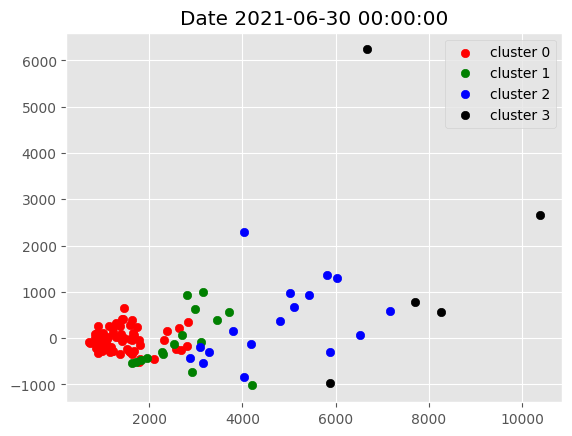

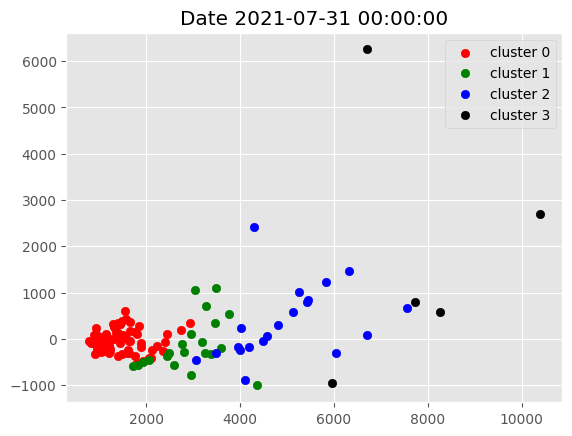

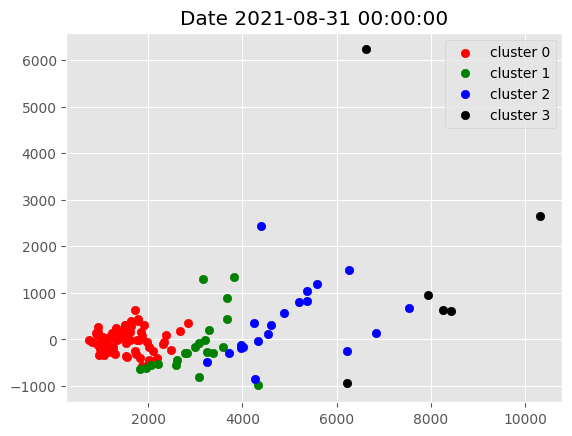

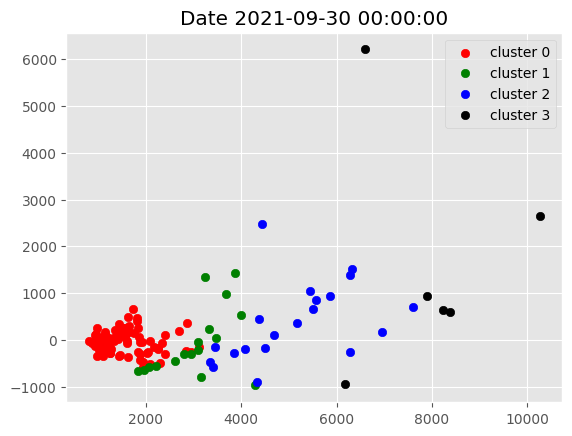

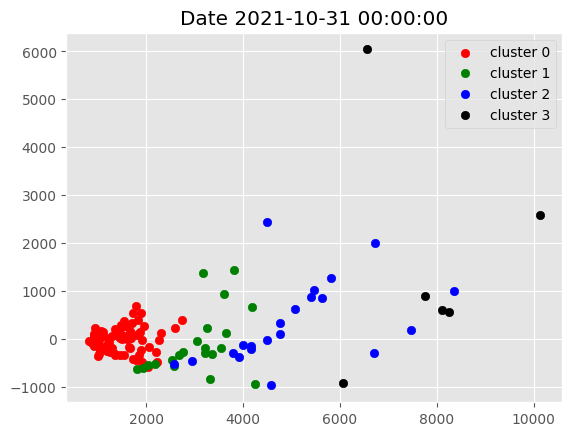

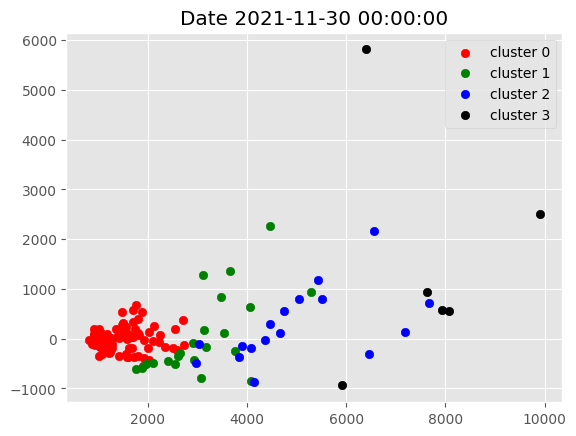

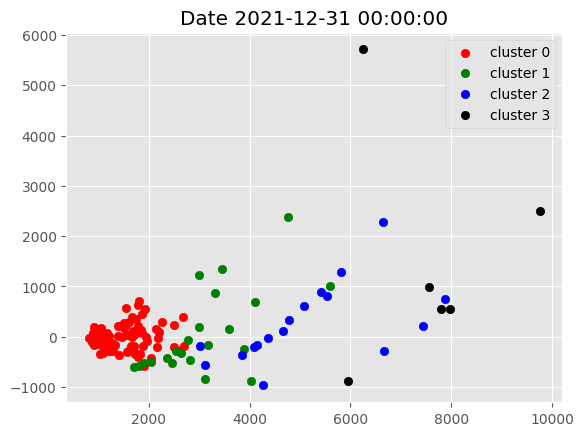

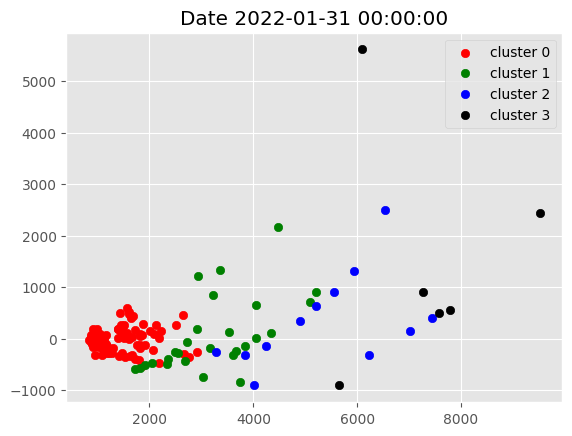

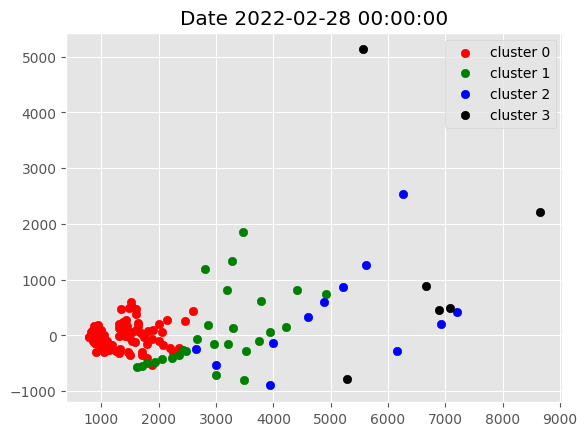

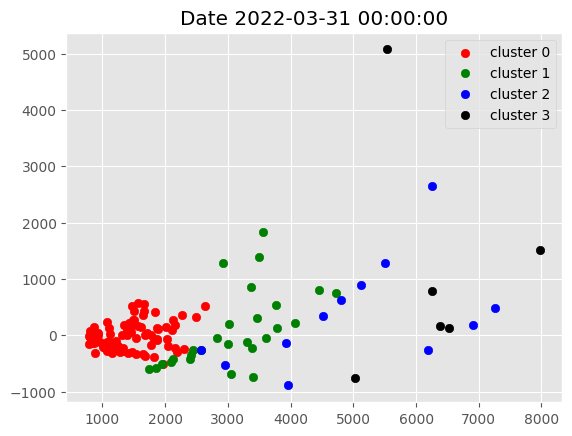

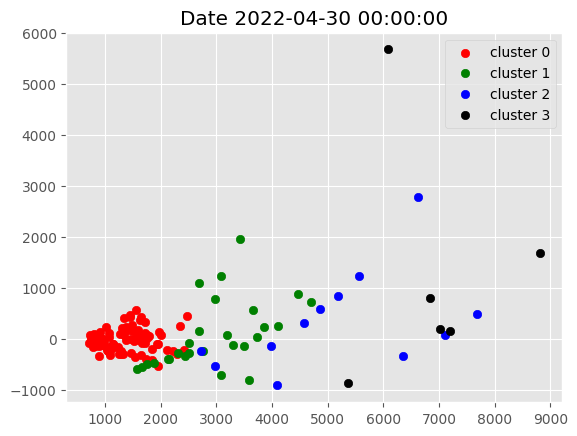

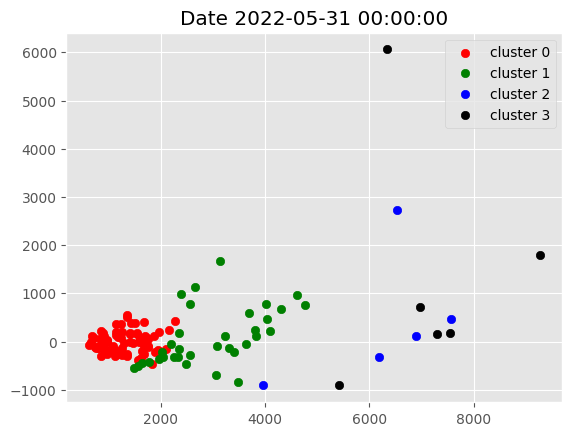

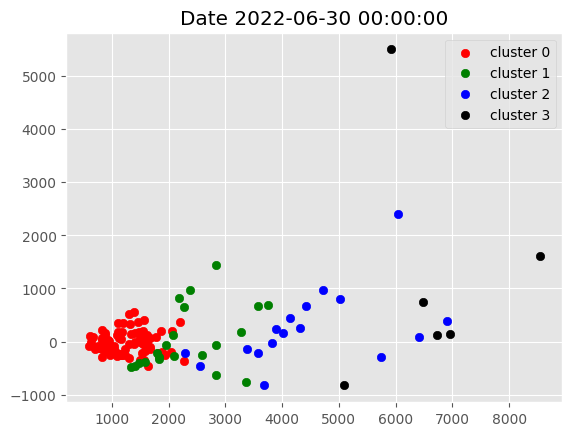

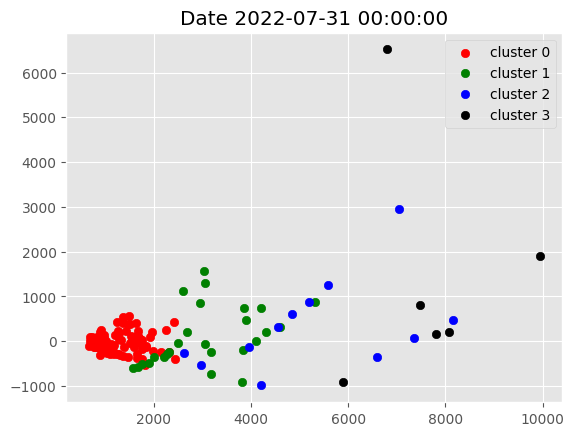

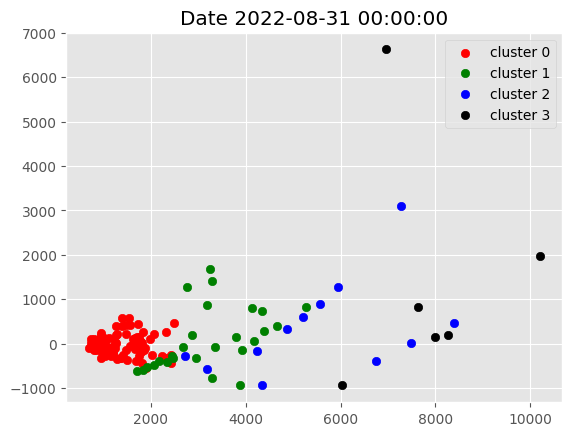

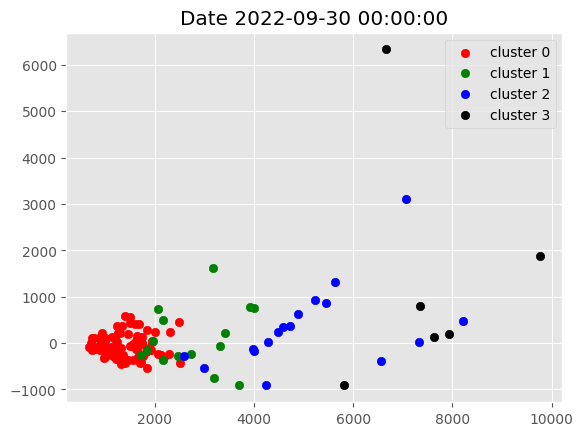

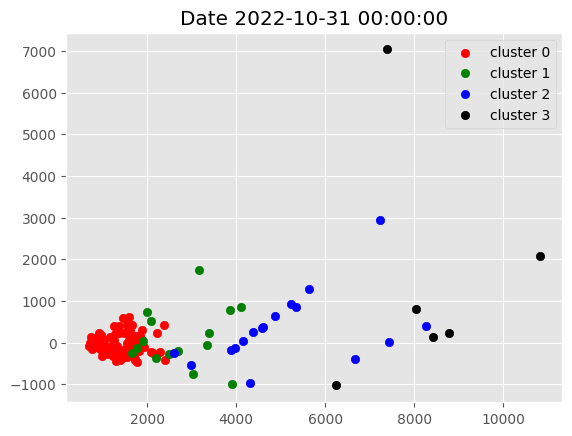

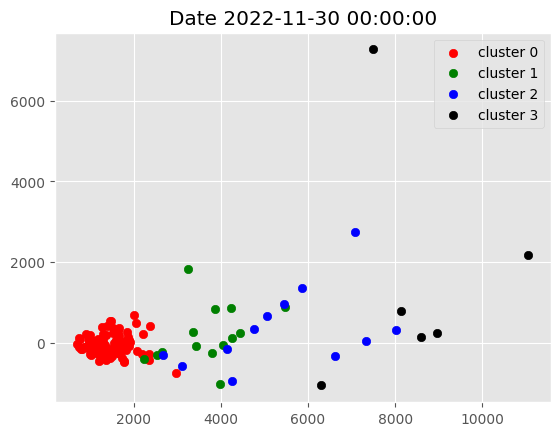

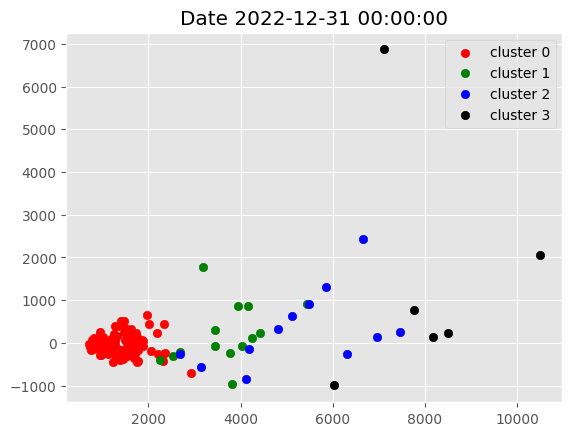

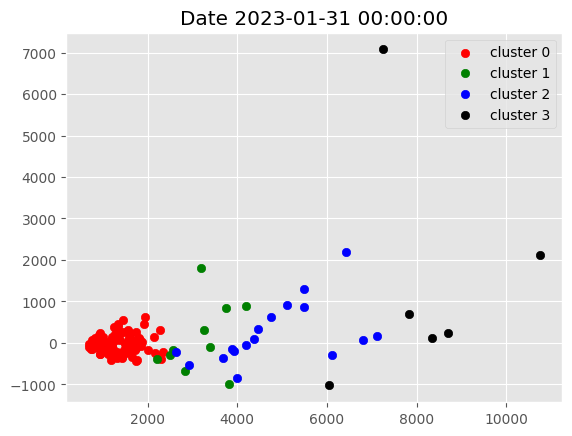

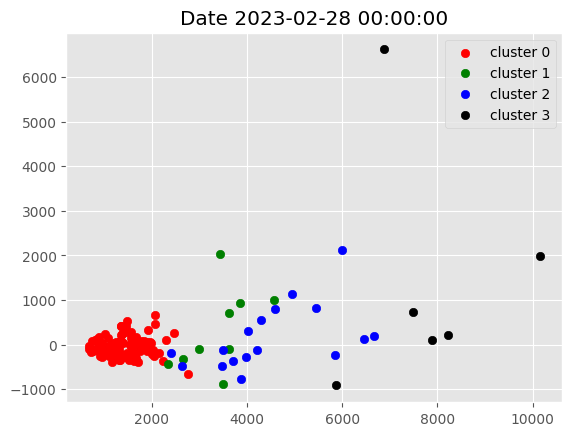

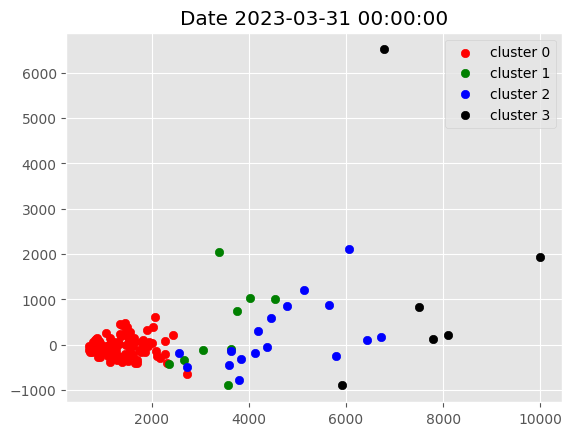

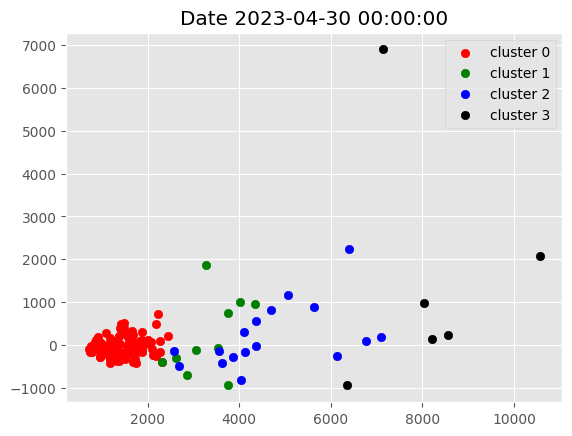

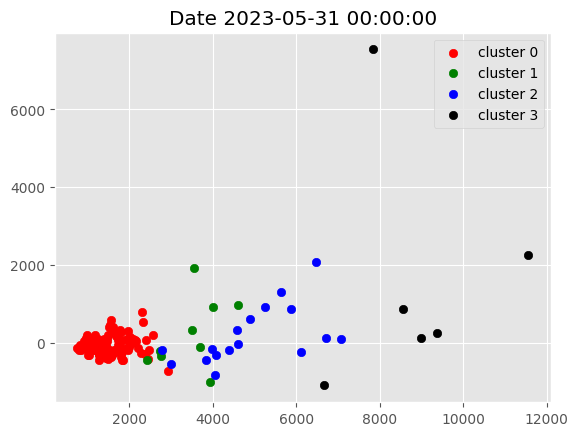

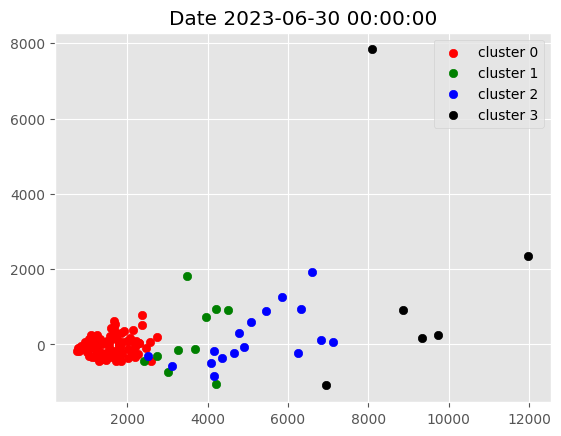

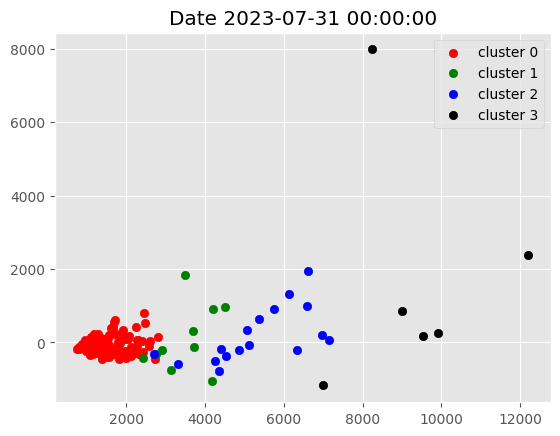

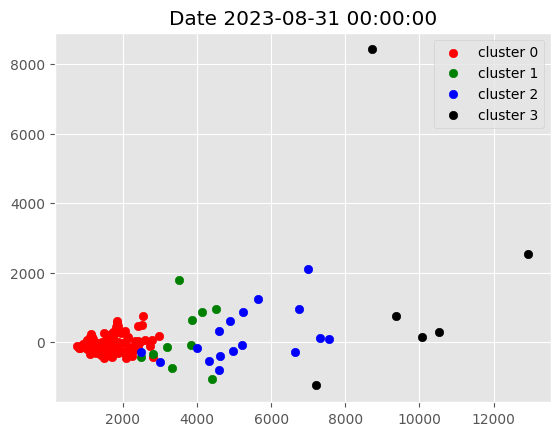

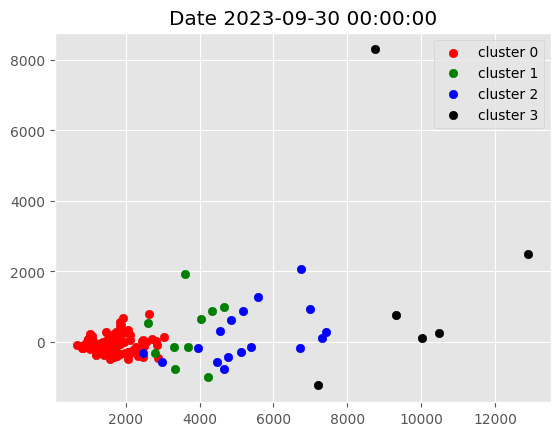

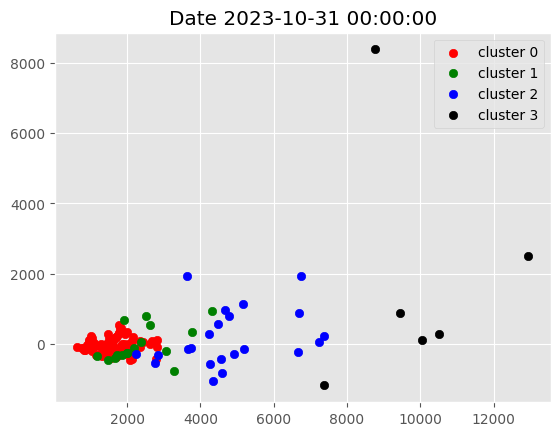

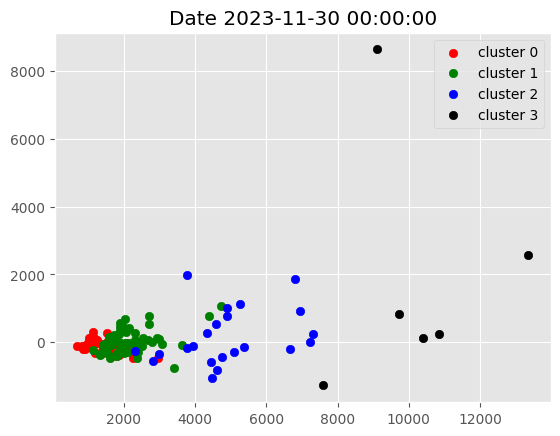

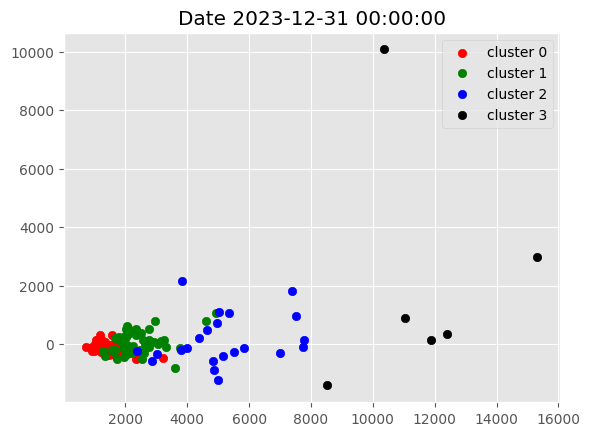

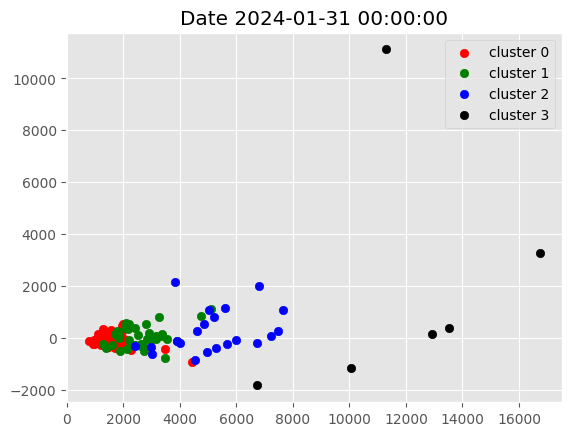

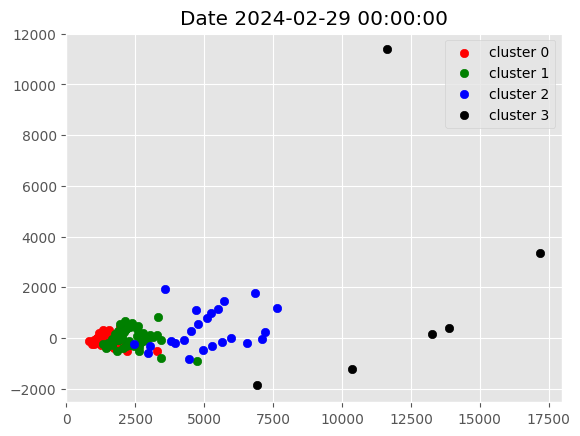

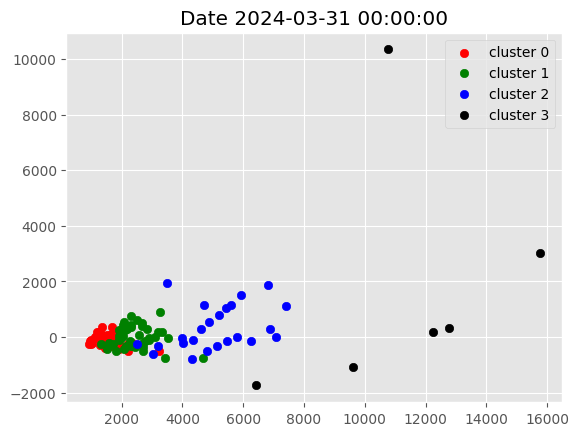

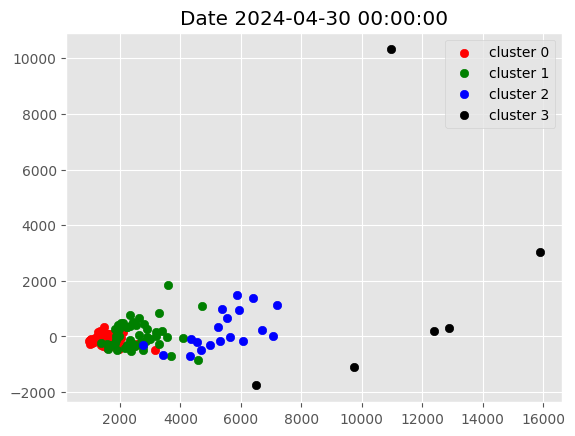

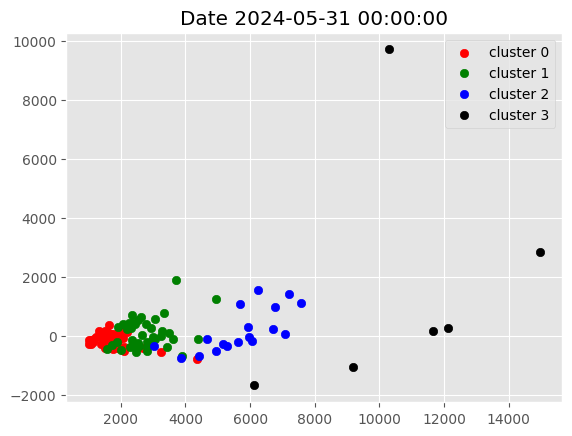

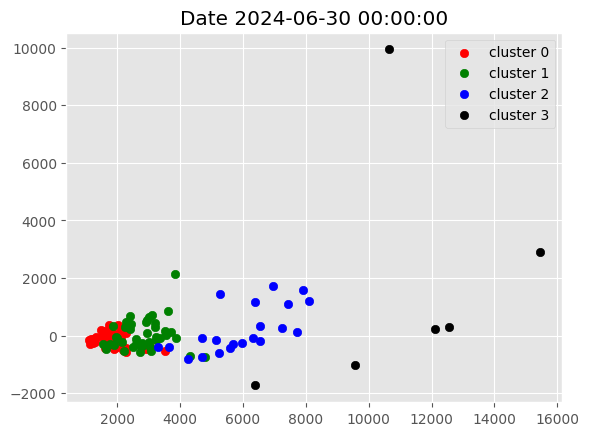

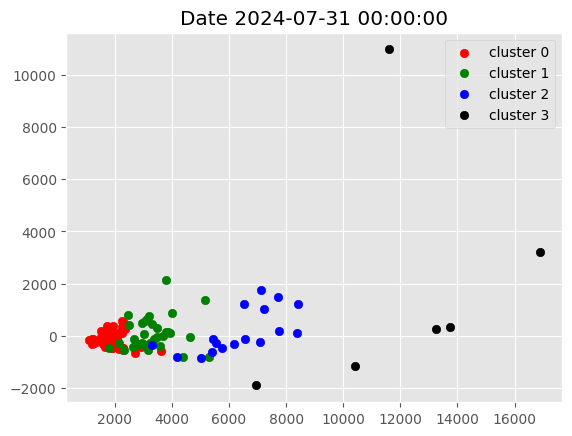

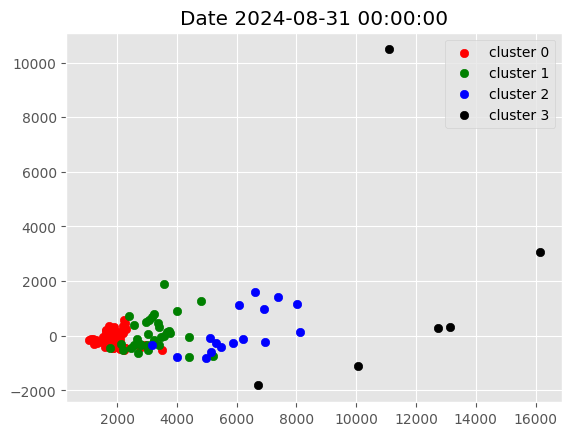

In [251]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

In [248]:
target_rsi_values = [1000, 2500, 6000, 8000]

initial_centroids = np.zeros((len(target_rsi_values), 20))

initial_centroids[:, 5] = target_rsi_values

initial_centroids

array([[   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0., 6000.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0., 8000.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]])

In [279]:
filtered_df = data[data['cluster']==1].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2021-07-01': ['BAJAJFINSV',
  'BAJFINANCE',
  'BALKRISIND',
  'BANDHANBNK',
  'BANKBARODA',
  'BATAINDIA',
  'BEL',
  'BHARATFORG',
  'BHARTIARTL',
  'BHEL',
  'BIOCON',
  'BPCL',
  'BRITANNIA',
  'CANBK',
  'ONGC',
  'PVRINOX'],
 '2021-08-01': ['AMBUJACEM',
  'BAJAJFINSV',
  'BAJFINANCE',
  'BALKRISIND',
  'BANDHANBNK',
  'BANKBARODA',
  'BATAINDIA',
  'BEL',
  'BHARATFORG',
  'BHARTIARTL',
  'BHEL',
  'BIOCON',
  'BPCL',
  'BRITANNIA',
  'CANBK',
  'INDUSINDBK',
  'INDUSTOWER',
  'INFY',
  'IOC',
  'ONGC',
  'PVRINOX'],
 '2021-09-01': ['AMBUJACEM',
  'BAJAJFINSV',
  'BAJFINANCE',
  'BALKRISIND',
  'BANDHANBNK',
  'BANKBARODA',
  'BATAINDIA',
  'BEL',
  'BHARATFORG',
  'BHARTIARTL',
  'BHEL',
  'BIOCON',
  'BPCL',
  'BRITANNIA',
  'CANBK',
  'INDUSINDBK',
  'INDUSTOWER',
  'INFY',
  'IOC',
  'ONGC',
  'PVRINOX'],
 '2021-10-01': ['AMBUJACEM',
  'BAJAJFINSV',
  'BAJFINANCE',
  'BALKRISIND',
  'BANDHANBNK',
  'BANKBARODA',
  'BATAINDIA',
  'BEL',
  'BHARATFORG',
  'BHARTIARTL',
  'BHEL

In [280]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, 1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

In [281]:
stocks = data.index.get_level_values('ticker').unique().tolist()
stocks

['AUBANK',
 'AUROPHARMA',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJAJFINSV',
 'BAJFINANCE',
 'BALKRISIND',
 'BANDHANBNK',
 'BANKBARODA',
 'BATAINDIA',
 'BEL',
 'BHARATFORG',
 'BHARTIARTL',
 'BHEL',
 'BIOCON',
 'BPCL',
 'BRITANNIA',
 'CANBK',
 'CHOLAFIN',
 'CIPLA',
 'COALINDIA',
 'COFORGE',
 'CONCOR',
 'DABUR',
 'DIVISLAB',
 'DLF',
 'DMART',
 'DRREDDY',
 'EICHERMOT',
 'ESCORTS',
 'FEDERALBNK',
 'GAIL',
 'GLENMARK',
 'GODREJCP',
 'GRASIM',
 'HAVELLS',
 'HCLTECH',
 'HDFCAMC',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDPETRO',
 'HINDUNILVR',
 'IBULHSGFIN',
 'ICICIBANK',
 'ICICIGI',
 'ICICIPRULI',
 'IDEA',
 'IGL',
 'INDIGO',
 'INDUSINDBK',
 'INDUSTOWER',
 'INFY',
 'IOC',
 'ITC',
 'JINDALSTEL',
 'JSWSTEEL',
 'JUBLFOOD',
 'JUSTDIAL',
 'KOTAKBANK',
 'LICHSGFIN',
 'LT',
 'LTF',
 'LUPIN',
 'M&M',
 'MANAPPURAM',
 'MARICO',
 'MARUTI',
 'MOTHERSON',
 'MRF',
 'MUTHOOTFIN',
 'NAUKRI',
 'NESTLEIND',
 'NMDC',
 'ONGC',
 'PAGEIND',
 'PEL',
 'PIDILITIND',
 'PNB',
 'POWERGRID',
 'PVRINOX',
 'RBLBA

In [282]:
new_data = pd.read_excel("new_data - Copy.xlsx")

new_data


,date,ticker,adj close,open,high,low,close,average,volume
0,30-Jun-2021,AUBANK,1077.30,1080.20,1083.50,1032.00,1035.85,1054.17,1611577
1,01-Jul-2021,AUBANK,1035.85,1042.00,1044.90,1020.05,1022.65,1030.26,900991
2,02-Jul-2021,AUBANK,1022.65,1024.00,1042.20,1024.00,1038.85,1035.86,726010
3,05-Jul-2021,AUBANK,1038.85,1044.95,1047.50,1021.75,1030.35,1032.74,656418
4,06-Jul-2021,AUBANK,1030.35,1056.00,1142.75,1056.00,1114.30,1117.81,8577690
...,...,...,...,...,...,...,...,...,...
153537,19-Aug-2024,ADANIENSOL,1085.30,1089.80,1111.90,1089.80,1092.55,1100.42,1782102
153538,20-Aug-2024,ADANIENSOL,1092.55,1097.85,1110.25,1090.80,1099.90,1099.38,1099089
153539,21-Aug-2024,ADANIENSOL,1099.90,1099.70,1115.50,1075.00,1088.40,1094.73,2048993
153540,22-Aug-2024,ADANIENSOL,1088.40,1092.00,1099.90,1075.00,1077.75,1087.52,1942688


In [283]:
new_data['date'] = pd.to_datetime(new_data['date'], format='%d-%b-%Y')

data_pivot = new_data.pivot_table(index='date', columns='ticker', 
                          values=['adj close', 'open', 'high', 'low', 'close', 'average', 'volume'],
                          aggfunc='first')
                          
data_pivot

adj close                                                       \
ticker           ACC ADANIENSOL ADANIENT ADANIGREEN ADANIPORTS ADANIPOWER   
date                                                                        
2021-06-30   2053.05    1115.20  1523.55    1126.30     711.00     116.30   
2021-07-01   2014.80    1059.45  1507.55    1124.90     703.70     113.45   
2021-07-02   1996.00    1006.50  1490.25    1068.70     703.10     107.80   
2021-07-05   1987.25     956.20  1422.05    1015.30     710.40     109.40   
2021-07-06   1982.75     908.40  1394.35     964.55     710.05     106.80   
...              ...        ...      ...        ...        ...        ...   
2024-08-19   2337.90    1085.30  3108.80    1831.00    1493.45     697.40   
2024-08-20   2347.45    1092.55  3102.55    1898.00    1496.45     697.00   
2024-08-21   2325.75    1099.90  3070.65    1924.60    1492.55     695.45   
2024-08-22   2325.15    1088.40  3115.70    1920.85    1503.50     695.15   
2024-08-23   2348.60    1077.75  3099.05    1886.35    1492.30     673.70   

                                                     ...     volume  \
ticker     AMBUJACEM APOLLOHOSP APOLLOTYRE ASHOKLEY  ... ULTRACEMCO   
date                                                 ...              
2021-06-30    344.40    3591.15     226.45   123.55  ...   283145.0   
2021-07-01    340.65    3619.85     225.00   122.60  ...   274106.0   
2021-07-02    340.30    3678.45     227.85   122.45  ...   256489.0   
2021-07-05    339.25    3733.20     227.45   122.45  ...   134014.0   
2021-07-06    340.30    3718.10     228.80   124.90  ...   681761.0   
...              ...        ...        ...      ...  ...        ...   
2024-08-19    640.50    6686.90     485.15   255.95  ...   244264.0   
2024-08-20    633.70    6724.90     483.00   257.50  ...   421084.0   
2024-08-21    626.45    6672.90     499.05   260.00  ...   456794.0   
2024-08-22    629.25    6752.45     506.25   260.25  ...   305457.0   
2024-08-23    557.55    6830.55     507.60   261.75  ...   258730.0   

                                                                    \
ticker       UNITDSPR        UPL        VEDL     VOLTAS      WIPRO   
date                                                                 
2021-06-30   879938.0  2180444.0   4782843.0  1197559.0  4293322.0   
2021-07-01   880033.0  1933865.0   3692800.0   516926.0  4329374.0   
2021-07-02  1314519.0  2511086.0   4336970.0   693139.0  4157307.0   
2021-07-05   968320.0  1812638.0   9431913.0   508998.0  3439169.0   
2021-07-06   927820.0  3097194.0   5573608.0   623245.0  4193441.0   
...               ...        ...         ...        ...        ...   
2024-08-19   828423.0  2412431.0  10922980.0  5251306.0  5733281.0   
2024-08-20   410409.0  1194020.0   8887888.0  4524759.0  4771906.0   
2024-08-21   614100.0  2235790.0  13609457.0  2331508.0  3227201.0   
2024-08-22  1011531.0  6309020.0   8864437.0  1913769.0  5748253.0   
2024-08-23   487071.0  1995012.0   6908675.0  1487294.0  5638853.0   

                                                             
ticker          YESBANK        ZEEL       ZOMATO  ZYDUSLIFE  
date                                                         
2021-06-30  106479676.0   6262355.0          NaN  2908630.0  
2021-07-01   70546748.0   7236555.0          NaN  5465599.0  
2021-07-02   55229264.0   5672652.0          NaN  3041858.0  
2021-07-05   70053302.0   4474970.0          NaN  2474384.0  
2021-07-06   62417703.0  11029058.0          NaN  1887653.0  
...                 ...         ...          ...        ...  
2024-08-19  131102426.0   9562094.0   80435895.0  1961205.0  
2024-08-20   87912368.0   6500142.0  132396556.0  1876826.0  
2024-08-21   83226963.0  17685721.0   38605742.0  2296195.0  
2024-08-22   85421132.0   8447493.0   73893288.0  1642199.0  
2024-08-23  111141944.0   6998221.0  102220794.0  2153807.0  

[782 rows x 1176 columns]

In [284]:
returns_dataframe = np.log(data_pivot['adj close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
   try:

      end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

      cols = fixed_dates[start_date]

      optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

      optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')

      optimization_df = data_pivot['adj close'][cols]['2020-07-01':'2021-06-30']

      optimization_df

      success = False
      try:
         weights = optimize_weights(prices=optimization_df, 
                     lower_bound=round(1/(len(optimization_df.columns)*2), 3))

         weights = pd.DataFrame(weights, index=pd.Series(0))
         success = True
         
      except:
         print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')

      if success==False:
         weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                       index=optimization_df.columns.tolist(),
                                       columns=pd.Series(0)).T
      
      temp_df = returns_dataframe[start_date:end_date]

      temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
         .merge(weights.stack().to_frame('weights').reset_index(level=0, drop=True),
               left_index=True,
               right_index=True)\
         .reset_index().set_index(['date', 'ticker']).unstack().stack()

      temp_df['weighted_return'] = temp_df['return']*temp_df['weights']

      temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

      portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
   
   except Exception as e:
      print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2021-07-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-08-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-11-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-12-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-01-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-06-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-07-01, Continuing with Equal-Weights

,Strategy Return
date,
2021-07-01,-0.003369
2021-07-02,-0.000295
2021-07-05,-0.000521
2021-07-06,0.002338
2021-07-07,0.000249
...,...
2024-08-19,0.015591
2024-08-20,0.002061
2024-08-21,0.006586


In [285]:
nifty = yf.download(tickers='^NSEI',
                    start='2021-06-30',
                    end=dt.date.today())

nifty_ret = np.log(nifty[['Adj Close']]).diff().dropna().rename({'Adj Close':'Nifty Buy&Hold'}, axis=1)

nifty_ret

[*********************100%%**********************]  1 of 1 completed

,Nifty Buy&Hold
Date,
2021-07-01,-0.002643
2021-07-02,0.002688
2021-07-05,0.007108
2021-07-06,-0.001017
2021-07-07,0.003874
...,...
2024-08-21,0.002885
2024-08-22,0.001666
2024-08-23,0.000469


In [286]:
portfolio_df = portfolio_df.merge(nifty_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

,Strategy Return,Nifty Buy&Hold
2021-07-01,-0.003369,-0.002643
2021-07-02,-0.000295,0.002688
2021-07-05,-0.000521,0.007108
2021-07-06,0.002338,-0.001017
2021-07-07,0.000249,0.003874
...,...,...
2024-08-19,0.015591,0.001283
2024-08-20,0.002061,0.005123
2024-08-21,0.006586,0.002885
2024-08-22,0.005939,0.001666


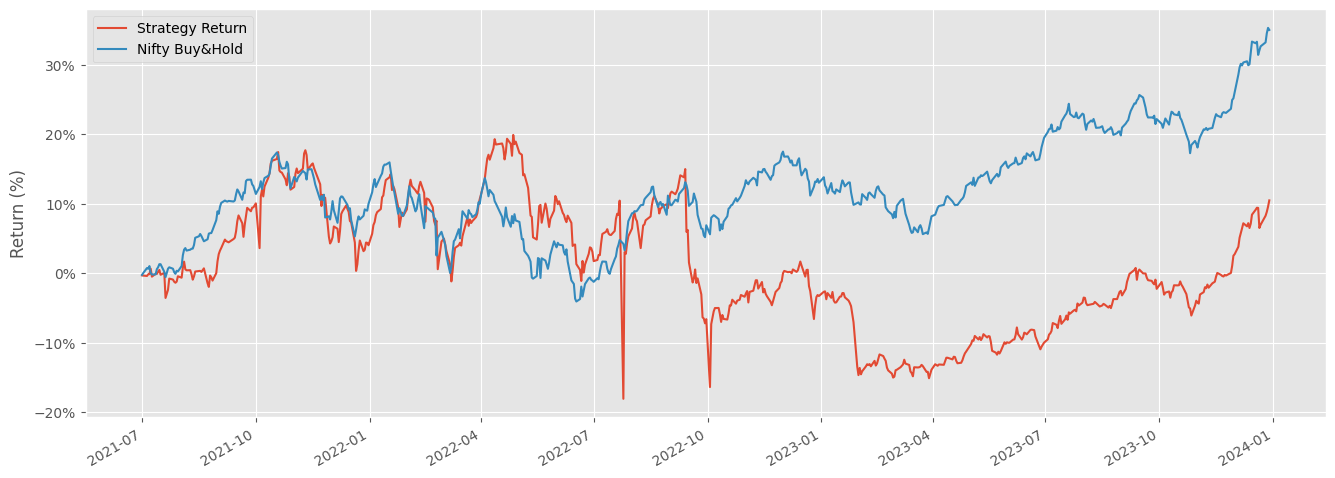

In [287]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()) - 1

portfolio_cumulative_return[:'2023-12-31'].plot(figsize=(16, 6))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylabel('Return (%)')

plt.show()